In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import scipy.integrate as integrate
from scipy.stats import multivariate_normal

In [2]:
realizedVariance = pd.read_csv('data/realizedVariance.csv', index_col='DATE')

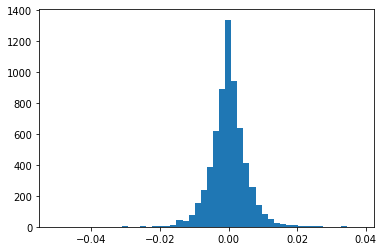

In [9]:
plt.hist(realizedVariance.DEXCAUS, bins=50)
plt.show()

In [57]:
def newB(y, B_prio, x = 1):
    def B_post(b):
        mu = np.sum(b * x)
        return (1 - norm.cdf(y, loc=mu))*B_prio(b)
    return B_post

def B_priori(x):
    return multivariate_normal.pdf(x, mean=0, cov=1)


In [58]:
integrate.quad(newB(y=0, B_prio=B_priori), -np.inf, np.inf)[0]

integrate.quad(newB(y=0, B_prio=newB(y=0, B_prio=B_priori)), 0, np.inf)[0] / integrate.quad(newB(y=0, B_prio=newB(y=0, B_prio=B_priori)), -np.inf, np.inf)[0]


0.8750000000000001

In [182]:
x = np.arange(0, 10, 0.01)

y = 0.1 + 0.6*x
y

array([0.1  , 0.106, 0.112, 0.118, 0.124, 0.13 , 0.136, 0.142, 0.148,
       0.154, 0.16 , 0.166, 0.172, 0.178, 0.184, 0.19 , 0.196, 0.202,
       0.208, 0.214, 0.22 , 0.226, 0.232, 0.238, 0.244, 0.25 , 0.256,
       0.262, 0.268, 0.274, 0.28 , 0.286, 0.292, 0.298, 0.304, 0.31 ,
       0.316, 0.322, 0.328, 0.334, 0.34 , 0.346, 0.352, 0.358, 0.364,
       0.37 , 0.376, 0.382, 0.388, 0.394, 0.4  , 0.406, 0.412, 0.418,
       0.424, 0.43 , 0.436, 0.442, 0.448, 0.454, 0.46 , 0.466, 0.472,
       0.478, 0.484, 0.49 , 0.496, 0.502, 0.508, 0.514, 0.52 , 0.526,
       0.532, 0.538, 0.544, 0.55 , 0.556, 0.562, 0.568, 0.574, 0.58 ,
       0.586, 0.592, 0.598, 0.604, 0.61 , 0.616, 0.622, 0.628, 0.634,
       0.64 , 0.646, 0.652, 0.658, 0.664, 0.67 , 0.676, 0.682, 0.688,
       0.694, 0.7  , 0.706, 0.712, 0.718, 0.724, 0.73 , 0.736, 0.742,
       0.748, 0.754, 0.76 , 0.766, 0.772, 0.778, 0.784, 0.79 , 0.796,
       0.802, 0.808, 0.814, 0.82 , 0.826, 0.832, 0.838, 0.844, 0.85 ,
       0.856, 0.862,

In [286]:
def newB(y, B_prio, x = 1):
    def B_post(b):
        mu = np.sum(b * x)
        return (1 - norm.cdf(y, loc=mu))*B_prio(b)
    return B_post

def B_priori(x):
    return multivariate_normal.pdf(x, mean=[0, 0], cov=np.array([[1,0],
                                                                 [0, 1]]))


In [287]:
for idx in range(len(y)):
    B_priori = newB(y=y[idx], B_prio=B_priori, x = np.array([1, x[idx]]))

In [218]:
a = -1
b = 1
def integrate(g, *args):
    n = len(args)
    runif = np.random.random([1000, n])*(b-a) + a
    g(runif)


In [316]:
a = -2
b = 2
runif = np.random.random([100000, 2])*(b-a) + a
print(runif)
np.mean(B_priori(runif)) * (b-a)**2

# def integrate_B(x):
#     return B_priori(x) / np.mean(B_priori(runif)) * (b-a)
#
# B_priori = integrate_B


[[-0.89070563  0.26512158]
 [ 0.40258798  0.65750664]
 [ 0.77684122  0.2683044 ]
 ...
 [ 1.87897302 -1.93624677]
 [-0.86086493 -1.44621067]
 [-0.04627702  0.73012729]]


0.9129633831136335

In [213]:
np.mean(B_priori(runif)) * (b-a)

RecursionError: maximum recursion depth exceeded